<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/CollectRealFingersData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration notebooks for Fingers datasets

### Run using a CPU Runtime (no GPU needed)

## Environment setup

In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1634      0 --:--:-- --:--:-- --:--:--  1634
Updating fastai...
Done.


In [2]:
!pip install fastai2 --upgrade
!pip install fastcore --upgrade
!pip install nbdev --upgrade

     |████████████████████████████████| 184kB 2.8MB/s 
Requirement already up-to-date: fastcore in /usr/local/lib/python3.6/dist-packages (0.1.16)
     |████████████████████████████████| 51kB 1.7MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai2.vision.all import *

In [0]:
escdrive = lambda x : x.as_posix().replace(' ','\ ')

In [0]:
gdrive = Path('/content/drive/My Drive/fastai_v4')

In [7]:
config = Config()
data_path = config.d['data_path']
archive_path = config.d['archive_path']
model_path = config.d['model_path']
(data_path, archive_path,model_path)

('/root/.fastai/data', '/root/.fastai/archive', '/root/.fastai/models')

## Collect Realworld Pics as Test Data

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


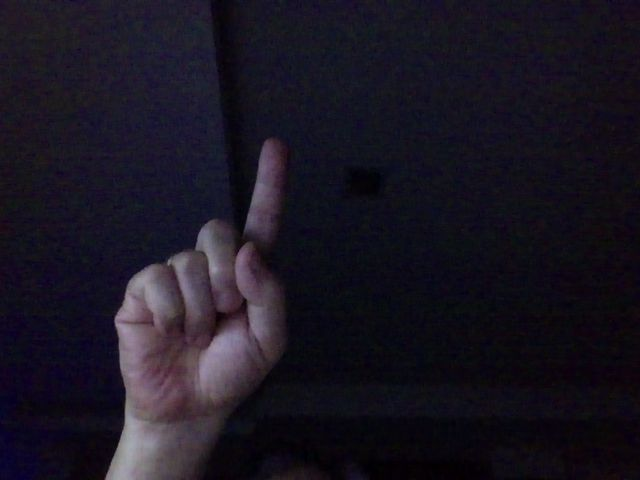

In [9]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
!mv photo.jpg test1_1R.jpg

In [0]:
!mkdir -p data/fingers/testset/orig
!mv *.jpg data/fingers/testset/orig

In [0]:
dataset = 'testset'
path = Path(data_path)/'fingers'

## Backup realworld testset to GDrive

In [0]:
!tar -czf {(Path(data_path)/(dataset + '.tgz')).as_posix()}  -C {Path(data_path).as_posix()} {path.as_posix()}  

tar: Removing leading `/' from member names


In [0]:
!cp data/testset.tgz {escdrive(gdrive/'data'/'fingers_testset.tgz')}